## Sales Performance Analysis

##### This project was analyzed by Gladys Odura Temeng
 - This analysis revealed that there is a positive correlation between discount percentage and quantity sold, meaning higher discounts lead to more purchases

##### Contact details
 - Email: oduratemeng@gmail.com
 - Tel: +233 240081892
 - LinkedIn: www.linkedin.com/in/gladys-temeng-b96858297

### Project Description
This project analyzes a sales dataset containing order details, shipping modes, customer segments, product categories, and pricing information. The dataset includes transactions from various regions in the United States, helping to identify sales trends and patterns across different segments and locations.

### Objective
The primary objective is to analyze sales performance by evaluating factors such as cost price, list price, 
discount percentage, and quantity sold. Additionally, the study aims to understand the impact of shipping modes, 
customer segments, and regional differences on sales performance.

### Business Questions
- How do different shipping modes affect sales performance and customer purchasing behavior?
- Which product categories and subcategories generate the highest revenue and profit?
- What is the impact of discounting on sales volume and overall profitability?
- Are there regional or state-level trends in sales performance?
- How do customer segments influence purchasing behavior?

### Hypothesis

#### 1. Impact of Discount on Sales Volume
 - Null Hypothesis (H₀): There is no significant relationship between the discount percentage and the quantity of products sold.
 - Alternative Hypothesis (H₁): A higher discount percentage leads to an increase in the quantity of products sold.
#### 2. Sales Performance by Shipping Mode
 - Null Hypothesis (H₀): Different shipping modes have no significant impact on total revenue.
 - Alternative Hypothesis (H₁): Certain shipping modes lead to higher total revenue.
#### 3. Regional Sales Trends
 - Null Hypothesis (H₀): Sales revenue is evenly distributed across all regions.
 - Alternative Hypothesis (H₁): Some regions generate significantly higher revenue than others.
#### 4. Customer Segment Influence on Sales
 - Null Hypothesis (H₀): Customer segment (Consumer, Corporate, or Home Office) does not significantly impact total revenue.
 - Alternative Hypothesis (H₁): Some customer segments contribute significantly more revenue than others.

In [3]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

In [7]:
# Creating the dataset from the provided data
data = {
    "Order Id": [1, 2, 3, 4, 5],
    "Order Date": pd.to_datetime(["2023-03-01", "2023-08-15", "2023-01-10", "2022-06-18", "2022-07-13"]),
    "Ship Mode": ["Second Class", "Second Class", "Second Class", "Standard Class", "Standard Class"],
    "Segment": ["Consumer", "Consumer", "Corporate", "Consumer", "Consumer"],
    "Country": ["United States"] * 5,
    "City": ["Henderson", "Henderson", "Los Angeles", "Fort Lauderdale", "Fort Lauderdale"],
    "State": ["Kentucky", "Kentucky", "California", "Florida", "Florida"],
    "Postal Code": [42420, 42420, 90036, 33311, 33311],
    "Region": ["South", "South", "West", "South", "South"],
    "Category": ["Furniture", "Furniture", "Office Supplies", "Furniture", "Office Supplies"],
    "Sub Category": ["Bookcases", "Chairs", "Labels", "Tables", "Storage"],
    "Product Id": ["FUR-BO-10001798", "FUR-CH-10000454", "OFF-LA-10000240", "FUR-TA-10000577", "OFF-ST-10000760"],
    "Cost Price": [240, 600, 10, 780, 20],
    "List Price": [260, 730, 10, 960, 20],
    "Quantity": [2, 3, 2, 5, 2],
    "Discount Percent": [2, 3, 5, 2, 5]
}

In [9]:
# Converting the dictionary to a DataFrame
df = pd.DataFrame(data)

In [25]:
# Display the first few rows of the dataset
print("Dataset Preview:\n", df.head())


Dataset Preview:
    Order Id Order Date       Ship Mode    Segment        Country  \
0         1 2023-03-01    Second Class   Consumer  United States   
1         2 2023-08-15    Second Class   Consumer  United States   
2         3 2023-01-10    Second Class  Corporate  United States   
3         4 2022-06-18  Standard Class   Consumer  United States   
4         5 2022-07-13  Standard Class   Consumer  United States   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky        42420  South        Furniture   
1        Henderson    Kentucky        42420  South        Furniture   
2      Los Angeles  California        90036   West  Office Supplies   
3  Fort Lauderdale     Florida        33311  South        Furniture   
4  Fort Lauderdale     Florida        33311  South  Office Supplies   

  Sub Category       Product Id  Cost Price  List Price  Quantity  \
0    Bookcases  FUR-BO-10001798         240         260         2   
1       

In [106]:
### Checking of missing data

df.isna().sum()

Order Id            0
Order Date          0
Ship Mode           0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
Cost Price          0
List Price          0
Quantity            0
Discount Percent    0
Total Revenue       0
Total Cost          0
Profit              0
dtype: int64

In [114]:
### Checking of duplicated data
df.duplicated().sum()

0

In [64]:
# 1. How do different shipping modes affect sales performance?
ship_mode_sales = df.groupby("Ship Mode")["Total Revenue"].sum()
print("\nTotal Revenue by Ship Mode:\n", ship_mode_sales)
df


Total Revenue by Ship Mode:
 Ship Mode
Second Class      2730
Standard Class    4840
Name: Total Revenue, dtype: int64


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent,Total Revenue,Total Cost,Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,520,480,40
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2190,1800,390
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,20,20,0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,4800,3900,900
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,40,40,0


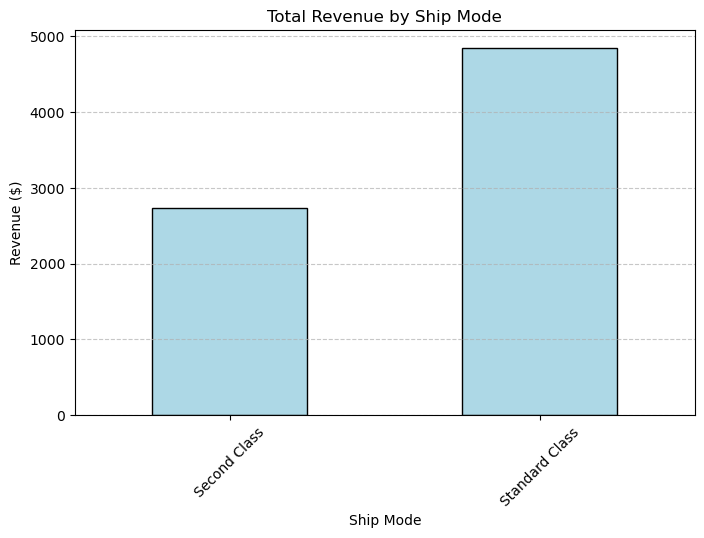

In [66]:
plt.figure(figsize=(8, 5))
ship_mode_sales.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Total Revenue by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
# 2. Which product categories generate the highest revenue?
category_sales = df.groupby("Category")["Total Revenue"].sum()
print("\nTotal Revenue by Category:\n", category_sales)


Total Revenue by Category:
 Category
Furniture          7510
Office Supplies      60
Name: Total Revenue, dtype: int64


In [37]:
# Calculating profit (Revenue - Cost)
df["Profit"] = df["Total Revenue"] - df["Total Cost"]

df

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Cost Price,List Price,Quantity,Discount Percent,Total Revenue,Total Cost,Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,520,480,40
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,2190,1800,390
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,20,20,0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,4800,3900,900
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,40,40,0


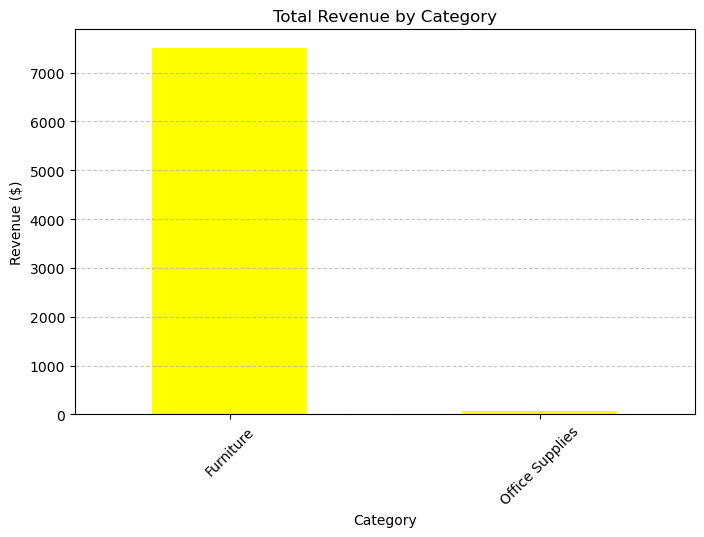

In [90]:
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='yellow', edgecolor='none')
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

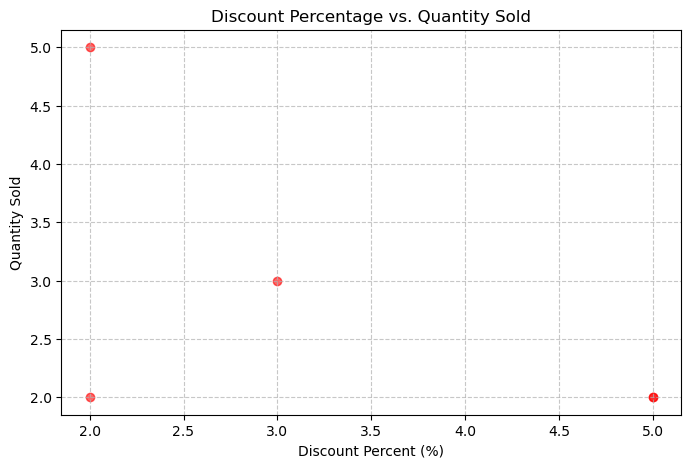

In [92]:
# 3. What is the impact of discounting on sales volume?
plt.figure(figsize=(8, 5))
plt.scatter(df["Discount Percent"], df["Quantity"], color='red', alpha=0.6)
plt.title("Discount Percentage vs. Quantity Sold")
plt.xlabel("Discount Percent (%)")
plt.ylabel("Quantity Sold")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [94]:
correlation = np.corrcoef(df["Discount Percent"], df["Quantity"])[0, 1]
print("\nCorrelation between Discount Percent and Quantity Sold:", correlation)


Correlation between Discount Percent and Quantity Sold: -0.5815799980377996


In [39]:
# Displaying key statistics of numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Order Id           Order Date   Postal Code  Cost Price  List Price  \
count  5.000000                    5      5.000000    5.000000    5.000000   
mean   3.000000  2022-12-17 00:00:00  48299.600000  330.000000  396.000000   
min    1.000000  2022-06-18 00:00:00  33311.000000   10.000000   10.000000   
25%    2.000000  2022-07-13 00:00:00  33311.000000   20.000000   20.000000   
50%    3.000000  2023-01-10 00:00:00  42420.000000  240.000000  260.000000   
75%    4.000000  2023-03-01 00:00:00  42420.000000  600.000000  730.000000   
max    5.000000  2023-08-15 00:00:00  90036.000000  780.000000  960.000000   
std    1.581139                  NaN  23771.741297  347.131099  429.685932   

       Quantity  Discount Percent  Total Revenue   Total Cost      Profit  
count   5.00000          5.000000       5.000000     5.000000    5.000000  
mean    2.80000          3.400000    1514.000000  1248.000000  266.000000  
min     2.00000          2.000000      20.00000

In [96]:
# 4. Are there regional trends in sales performance?
region_sales = df.groupby("Region")["Total Revenue"].sum()
print("\nTotal Revenue by Region:\n", region_sales)


Total Revenue by Region:
 Region
South    7550
West       20
Name: Total Revenue, dtype: int64


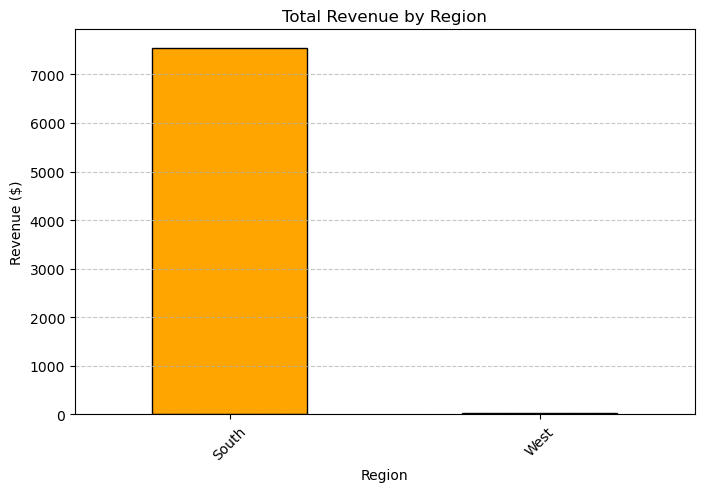

In [98]:
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [100]:
# 5. How do customer segments influence purchasing behavior?
segment_sales = df.groupby("Segment")["Total Revenue"].sum()
print("\nTotal Revenue by Customer Segment:\n", segment_sales)


Total Revenue by Customer Segment:
 Segment
Consumer     7550
Corporate      20
Name: Total Revenue, dtype: int64


In [41]:
# Analyzing sales performance by category
category_sales = df.groupby("Category")["Total Revenue"].sum()
print("\nTotal Revenue by Category:\n", category_sales)


Total Revenue by Category:
 Category
Furniture          7510
Office Supplies      60
Name: Total Revenue, dtype: int64


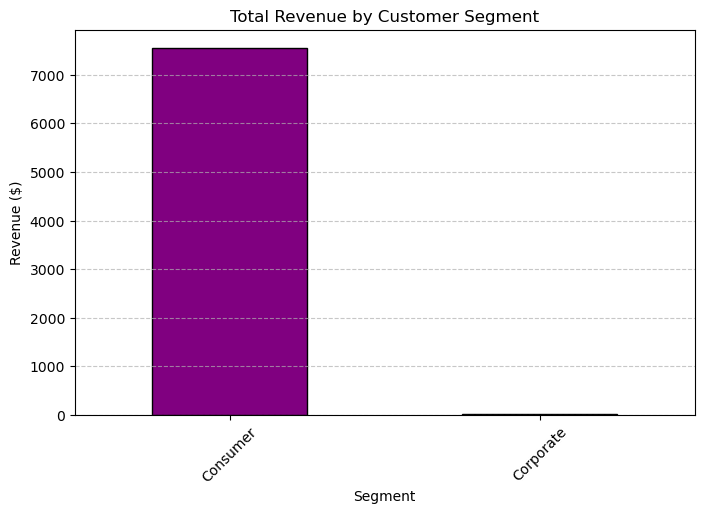

In [102]:
plt.figure(figsize=(8, 5))
segment_sales.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Total Revenue by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

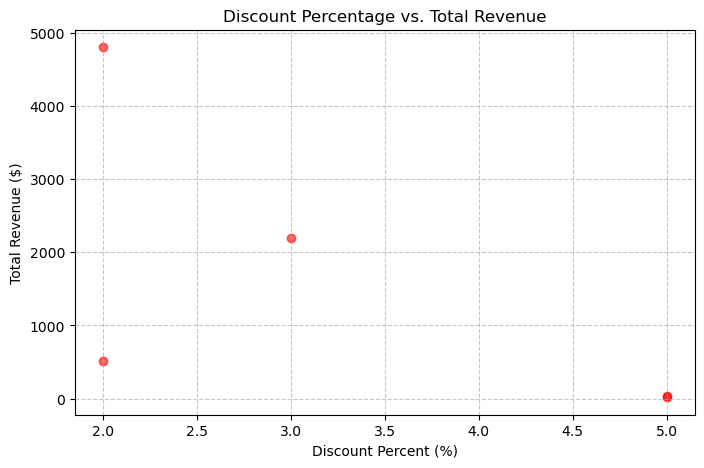

In [51]:
# Analyzing discount impact on revenue
plt.figure(figsize=(8, 5))
plt.scatter(df["Discount Percent"], df["Total Revenue"], color='red', alpha=0.6)
plt.title("Discount Percentage vs. Total Revenue")
plt.xlabel("Discount Percent (%)")
plt.ylabel("Total Revenue ($)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [53]:
# Analyzing profit by region
region_profit = df.groupby("Region")["Profit"].sum()
print("\nTotal Profit by Region:\n", region_profit)


Total Profit by Region:
 Region
South    1330
West        0
Name: Profit, dtype: int64


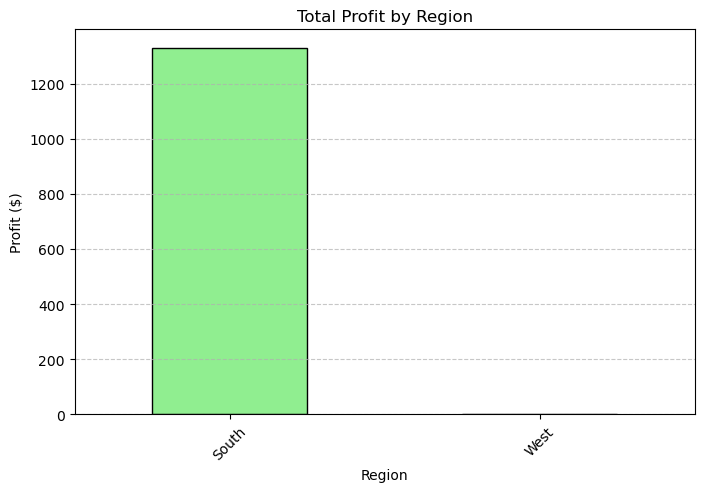

In [55]:
# Visualizing profit by region
plt.figure(figsize=(8, 5))
region_profit.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [57]:
# Checking if higher discounts lead to increased sales
correlation = np.corrcoef(df["Discount Percent"], df["Quantity"])[0, 1]
print("\nCorrelation between Discount Percent and Quantity Sold:", correlation)


Correlation between Discount Percent and Quantity Sold: -0.5815799980377996
